In [45]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Create a synthetic regression dataset
x, y = make_regression(
    n_samples=200,  # Number of samples
    n_features=4,   # Number of features
    noise=10,       # Level of noise in the data
    random_state=42
)

columns = [f'Feature_{i+1}' for i in range(x.shape[1])]
data = pd.DataFrame(data=np.c_[x, y], columns=columns + ['Target'])


In [47]:
data.to_csv('regression_data.csv', index=False)

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=.25)

In [36]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=.01)

In [37]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trains=std.fit_transform(x_train)
x_tests=std.fit_transform(x_test)

In [38]:
lasso.fit(x_trains,y_train)

Lasso(alpha=0.01)

In [39]:
y_pred=lasso.predict(x_tests)

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
r2_score(y_test, y_pred)

0.9749006528508571

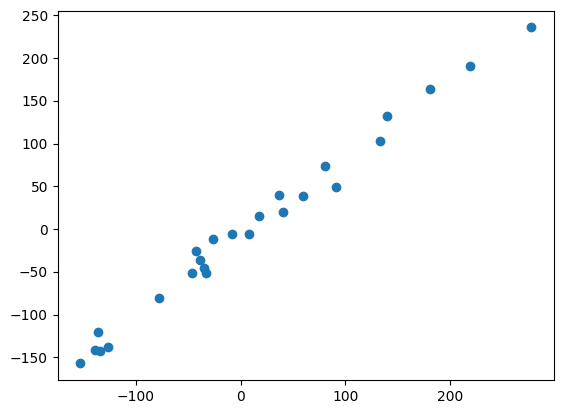

In [41]:
plt.scatter(y_test,y_pred)